###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

(1000, 5)
(1000,)


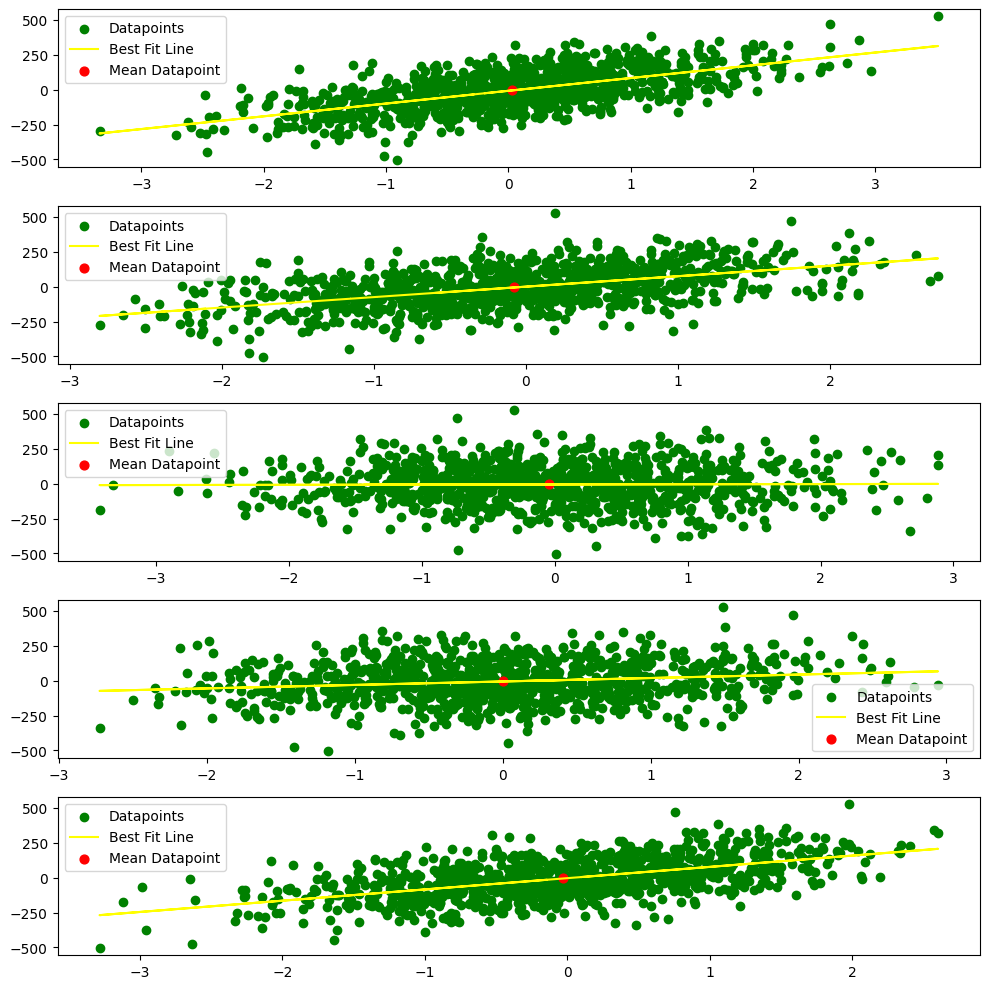

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

a, b = make_regression(n_samples=1000, n_features=5, n_targets=1)

print(a.shape)
print(b.shape)

fig, ax = plt.subplots(5, 1, figsize=(10, 10))
for i in range(5):
    ax[i].scatter(a[:, i], b, label='Datapoints', color='green')
    model = LinearRegression()
    xi = np.array(a[:, i]).reshape(-1, 1)
    b = np.array(b)
    model.fit(xi, b)
    mean = np.mean(xi)
    best_fit_line = model.predict(xi)
    average_point = model.predict([[mean]])
    ax[i].plot(a[:, i], best_fit_line, label='Best Fit Line', color='yellow')
    ax[i].scatter(mean, average_point, label='Mean Datapoint', color='red', s=40)
    ax[i].legend()

plt.tight_layout()
plt.show()



### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

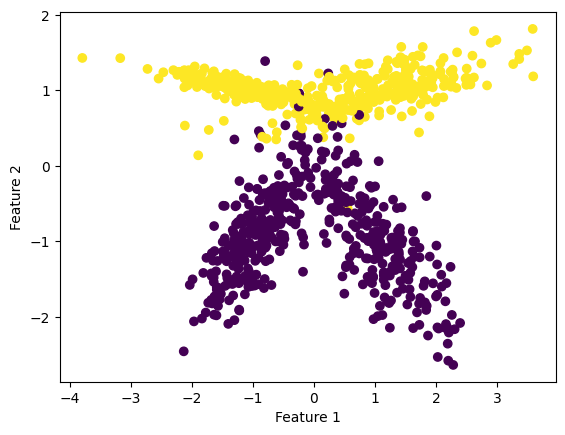

In [46]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

u, v = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

plt.scatter(u[:, 0], u[:, 1], c=v)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

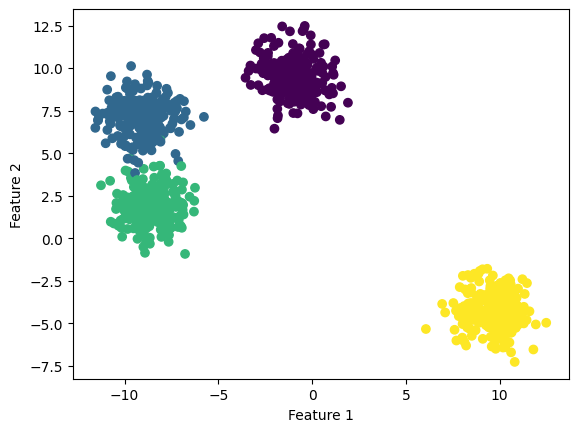

In [47]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

p, q = make_blobs(n_samples=1000, n_features=2, centers=4)

plt.scatter(p[:, 0], p[:, 1], c=q)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [43]:
import requests as req 
from bs4 import BeautifulSoup 
import pandas as pd

url = 'https://www.worldometers.info/coronavirus/'
page= req.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

table = soup.find('table', id='main_table_countries_today') 
headers = [] 
first_row= table.find('tr')

for i in first_row.find_all('th'):
    title = i.text 
    headers.append(title)

mydata = pd.DataFrame (columns=headers)
for j in table.find_all('tr')[1:]:
     row_data = j.find_all('td') 
     row = [i.text for i in row_data] 
     length = len(mydata) 
     mydata.loc[length] = row

mydata.drop(mydata.columns [[0, 9, 10, 11, 12, 13, 14,
                              15, 16, 17, 18, 19, 20, 21]], axis=1, inplace=True)

mydata1 = mydata.loc[0:238]
print(mydata1)
 


         Country,Other   TotalCases NewCases   
0    \nNorth America\n  126,648,037     +217  \
1             \nAsia\n  217,286,137   +6,798   
2           \nEurope\n  249,247,865            
3    \nSouth America\n   68,674,084            
4          \nOceania\n   14,309,495            
..                 ...          ...      ...   
234       Vatican City           29            
235     Western Sahara           10            
236         MS Zaandam            9            
237            Tokelau            5            
238              China      503,302            

                               TotalDeaths NewDeaths TotalRecovered   
0                                1,632,544        +1    122,496,199  \
1                                1,546,165       +12    201,004,771   
2                                2,059,483              245,194,849   
3                                1,355,584               66,460,340   
4                                   27,779               14,137,852 

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Original class distribution: Counter({0: 945, 1: 55})


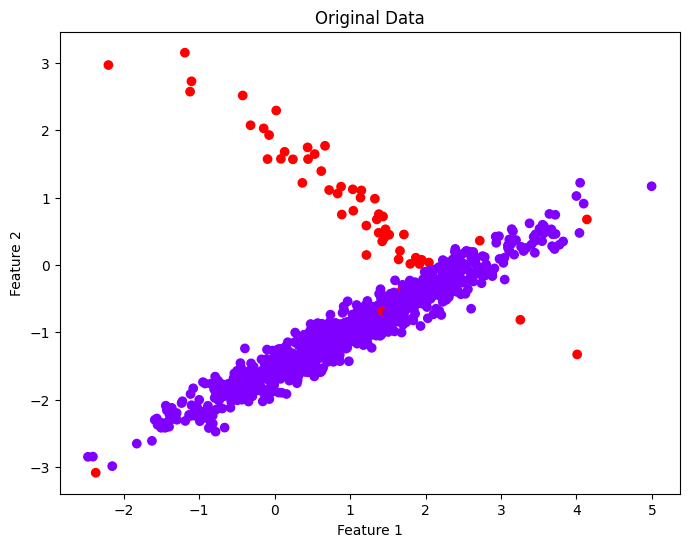

Oversampled class distribution: Counter({0: 945, 1: 189})


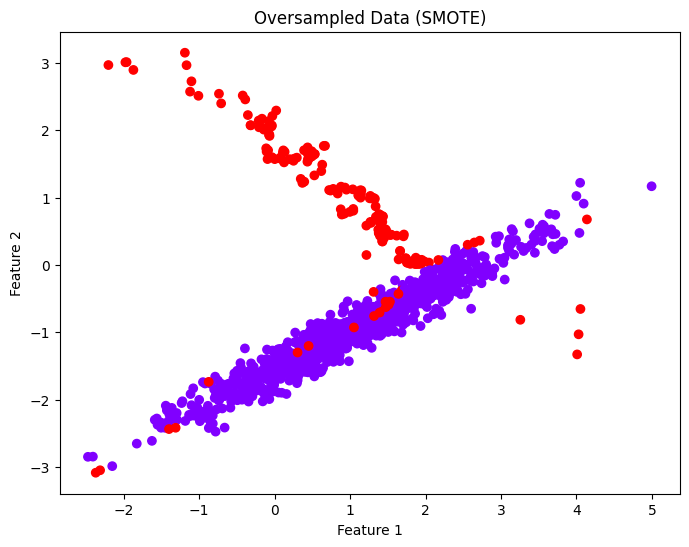

Undersampled class distribution: Counter({0: 91, 1: 55})


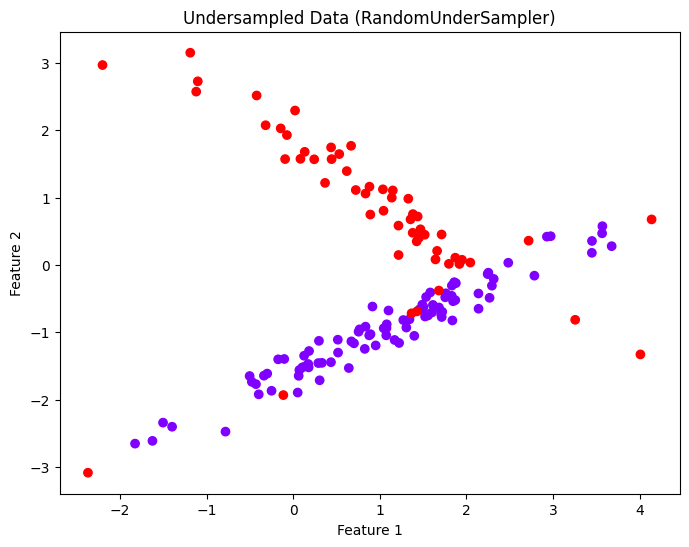

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

np.random.seed(42)
num_samples = 1000
num_features = 2
num_classes = 2
num_clusters = 1
imbalance_ratio = 0.05

G, H = make_classification(n_samples=num_samples, n_features=num_features,
                           n_informative=num_features, n_redundant=0,
                           n_classes=num_classes, n_clusters_per_class=num_clusters,
                           weights=[imbalance_ratio, 1 - imbalance_ratio])


class_counts = Counter(H)
print("Class Distribution (Before Resampling):", class_counts)

plt.figure(figsize=(8, 6))
plt.scatter(G[:, 0], G[:, 1], c=H, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Imbalanced Classification Dataset')
plt.grid(True)
plt.colorbar()
plt.show()

oversampler = SMOTE(random_state=42)
G_oversampled, H_oversampled = oversampler.fit_resample(G, H)
oversampled_class_counts = Counter(H_oversampled)
print("Class Distribution (After Oversampling):", oversampled_class_counts)


plt.figure(figsize=(8, 6))
plt.scatter(G_oversampled[:, 0], G_oversampled[:, 1], c=H_oversampled, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Oversampled Classification Dataset')
plt.grid(True)
plt.colorbar()
plt.show()

undersampler = RandomUnderSampler(sampling_strategy=0.05, random_state=42)
G_undersampled, H_undersampled = undersampler.fit_resample(G, H)
undersampled_class_counts = Counter(H_undersampled)
print("Class Distribution (After Undersampling):", undersampled_class_counts)

plt.figure(figsize=(8, 6))
plt.scatter(G_undersampled[:, 0], G_undersampled[:, 1], c=H_undersampled, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Undersampled Classification Dataset')
plt.grid(True)
plt.colorbar()
plt.show()




##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [39]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


iris = load_iris()
S = iris.data
T = iris.target


df = pd.DataFrame(data=S, columns=iris.feature_names)
print(df.head())

print("Missing values:", df.isnull().sum())


S_train, S_test, T_train, T_test = train_test_split(S, T, test_size=0.3, random_state=42)


print("Training set dimensions:", S_train.shape, T_train.shape)
print("Testing set dimensions:", S_test.shape, T_test.shape)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(S_train)
X_test_scaled = scaler.transform(S_test)


df_train_scaled = pd.DataFrame(data=X_train_scaled, columns=iris.feature_names)
print(df_train_scaled.head())

First 5 rows of DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Missing values in DataFrame:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Dimensions of training set: (105, 4)
Dimensions of testing set: (45, 4)

First 5 rows of standardized training set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2           0.671802          0.21701